# Instituto Federal de Educação, Ciência e Tecnologia de Pernambuco.
### Nesta atividade, o problema do caixeiro viajante será implementado com um algoritmo genético que retorne o melhor resultado.
###  Integrantes: Breno Henrique Montenegro de Freitas e Elton Luiz Alves.
### Professor: Rodrigo Lira.


# Instruções:

- Executar 30 vezes.
- Calcular a média e o desvio padrão da qualidade (fitness) das
soluções finais encontradas.
- Gráfico de Convergência do AG (melhor fitness por iteração).
- Criar boxplot com os resultados finais.

# Implementação completa do Algoritmo Genético
## Nesta seção, o algoritmo genético será implementado dando prosseguimento no código feito na atividade anterior.
- instância disponibilizada pelo professor através do link: https://gist.github.com/rodrigoclira/1cc3dfc603740decb4269096aa7ac122

In [ ]:
import random
import numpy as np
import matplotlib.pyplot as plt
import statistics

# Matriz de distâncias
USA13 = [
    [0, 2451, 713, 1018, 1631, 1374, 2408, 213, 2571, 875, 1420, 2145, 1972],
    [2451, 0, 1745, 1524, 831, 1240, 959, 2596, 403, 1589, 1374, 357, 579],
    [713, 1745, 0, 355, 920, 803, 1737, 851, 1858, 262, 940, 1453, 1260],
    [1018, 1524, 355, 0, 700, 862, 1395, 1123, 1584, 466, 1056, 1280, 987],
    [1631, 831, 920, 700, 0, 663, 1021, 1769, 949, 796, 879, 586, 371],
    [1374, 1240, 803, 862, 663, 0, 1681, 1551, 1765, 547, 225, 887, 999],
    [2408, 959, 1737, 1395, 1021, 1681, 0, 2493, 678, 1724, 1891, 1114, 701],
    [213, 2596, 851, 1123, 1769, 1551, 2493, 0, 2699, 1038, 1605, 2300, 2099],
    [2571, 403, 1858, 1584, 949, 1765, 678, 2699, 0, 1744, 1645, 653, 600],
    [875, 1589, 262, 466, 796, 547, 1724, 1038, 1744, 0, 679, 1272, 1162],
    [1420, 1374, 940, 1056, 879, 225, 1891, 1605, 1645, 679, 0, 1017, 1200],
    [2145, 357, 1453, 1280, 586, 887, 1114, 2300, 653, 1272, 1017, 0, 504],
    [1972, 579, 1260, 987, 371, 999, 701, 2099, 600, 1162, 1200, 504, 0],
]

NUM_CIDADES = 13
POPULACAO = 50
GERACOES = 400
TAMANHO_TORNEIO = 3
TAXA_CROSSOVER = 0.9
TAXA_MUTACAO = 0.05
ELITISMO = 5


def calcular_distancia_total(rota, matriz):

    distancia_total = 0

    for i in range(len(rota) - 1):
        distancia_total += matriz[rota[i]][rota[i + 1]]
    return distancia_total


def valida_rota(rota, numero_cidades):
  return (rota[0] == rota[-1]) and (len(set(rota[:-1])) == numero_cidades)


def gerar_rota(numero_cidades):
  rota = list(range(numero_cidades))
  random.shuffle(rota)
  rota.append(rota[0])
  return rota

  rota_teste = gerar_rota(13)
  print("A rota gerada foi: ",rota_teste)
  resultado_rota = valida_rota(rota_teste,13)
  if(resultado_rota):
    print(calcular_distancia_total(rota_teste,USA13))
  else: print("Rota inválida")


def gerar_populacao(numero_cidades, tamanho_populacao):

    populacao = []

    for i in range(tamanho_populacao):
        populacao.append(gerar_rota(numero_cidades))
    return populacao


def avaliar_populacao(populacao, matriz):

    avaliacoes = []

    for rota in populacao:
        distancia = calcular_distancia_total(rota, matriz)
        avaliacoes.append(distancia)
    return avaliacoes


def selecao_do_torneio(populacao, avaliacoes, tamanho_torneio):

    selecionados = []

    for i in range(2):
        torneio = random.sample(list(zip(populacao, avaliacoes)), tamanho_torneio)
        torneio.sort(key=lambda x: x[1])
        selecionados.append(torneio[0][0])
    return selecionados[0], selecionados[1]


def crossover(pai1, pai2):
    inicio = random.randint(0, len(pai1) - 3)
    fim = random.randint(inicio + 1, len(pai1) - 2)
    filho = []

    for i in range(len(pai1)):
      filho.append(None)

    for i in range(inicio, fim):
      filho[i] = pai1[i]

    for cidade in pai2:
      if cidade not in filho:
        for j in range(len(filho) - 1):
          if filho[j] == None:
            filho[j] = cidade
            break

    filho[-1] = filho[0]

    return filho


def mutacao(rota, taxa_mutacao):

    nova_rota = rota[:]

    for i in range(1, len(nova_rota) - 1):
        if random.random() < taxa_mutacao:
            j = random.randint(1, len(nova_rota) - 2)
            temp = nova_rota[i]
            nova_rota[i] = nova_rota[j]
            nova_rota[j] = temp
    nova_rota[-1] = nova_rota[0]
    return nova_rota


def executar_algoritmo_genetico():

    populacao = gerar_populacao(NUM_CIDADES, POPULACAO)
    melhores_resultados = []

    for g in range(GERACOES):
        avaliacoes = avaliar_populacao(populacao, USA13)

        pares = list(zip(avaliacoes, populacao))
        pares.sort(key=lambda x: x[0])
        populacao_ordenada = [x[1] for x in pares]

        nova_populacao = []
        for i in range(ELITISMO):
            nova_populacao.append(populacao_ordenada[i])

        while len(nova_populacao) < POPULACAO:
            pai1, pai2 = selecao_do_torneio(populacao, avaliacoes, TAMANHO_TORNEIO)
            if random.random() < TAXA_CROSSOVER:
                filho = crossover(pai1, pai2)
            else:
                filho = pai1[:]
            filho = mutacao(filho, TAXA_MUTACAO)
            nova_populacao.append(filho)

        populacao = nova_populacao
        melhor_distancia = min(avaliacoes)
        melhores_resultados.append(melhor_distancia)

    return min(melhores_resultados), melhores_resultados


resultados_finais = []
todas_geracoes = []

for i in range(30):
    melhor, historico = executar_algoritmo_genetico()
    resultados_finais.append(melhor)
    todas_geracoes.append(historico)
    print(f"Execução {i+1}/30 finalizada | Melhor distância: {melhor}")

Execução 1/30 finalizada | Melhor distância: 7310
Execução 2/30 finalizada | Melhor distância: 7293
Execução 3/30 finalizada | Melhor distância: 7622
Execução 4/30 finalizada | Melhor distância: 7622
Execução 5/30 finalizada | Melhor distância: 7293
Execução 6/30 finalizada | Melhor distância: 7293
Execução 7/30 finalizada | Melhor distância: 7293
Execução 8/30 finalizada | Melhor distância: 7293
Execução 9/30 finalizada | Melhor distância: 7569
Execução 10/30 finalizada | Melhor distância: 7534
Execução 11/30 finalizada | Melhor distância: 7569
Execução 12/30 finalizada | Melhor distância: 7293
Execução 13/30 finalizada | Melhor distância: 7622
Execução 14/30 finalizada | Melhor distância: 7318
Execução 15/30 finalizada | Melhor distância: 7622
Execução 16/30 finalizada | Melhor distância: 7293
Execução 17/30 finalizada | Melhor distância: 7293
Execução 18/30 finalizada | Melhor distância: 7293
Execução 19/30 finalizada | Melhor distância: 7704
Execução 20/30 finalizada | Melhor distâ

# Métricas estatísticas e gráfico de convergência


Média das distâncias: 7413.67
Desvio padrão: 157.78
---------------------------------------------------------------------------
                                 GRÁFICO                                  
---------------------------------------------------------------------------


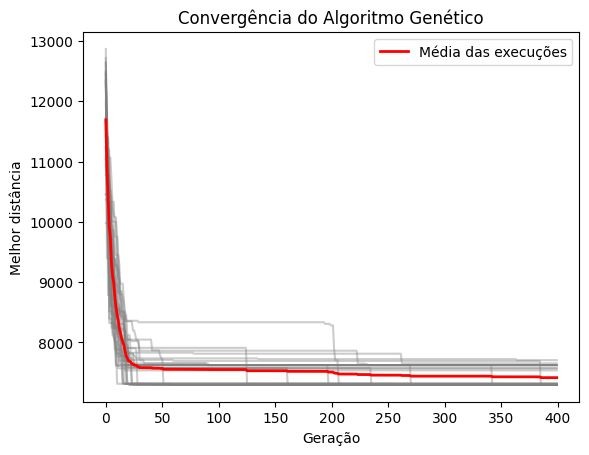

In [ ]:
media = statistics.mean(resultados_finais)
desvio = statistics.stdev(resultados_finais)
print("\nMédia das distâncias:", round(media, 2))
print("Desvio padrão:", round(desvio, 2))

texto = "GRÁFICO"
print(25 * "---")
print(texto.center(74))
print(25 * "---")

plt.figure()
for h in todas_geracoes:
    plt.plot(h, color='gray', alpha=0.4)
plt.plot(np.mean(todas_geracoes, axis=0), color='red', linewidth=2, label='Média das execuções')
plt.title("Convergência do Algoritmo Genético")
plt.xlabel("Geração")
plt.ylabel("Melhor distância")
plt.legend()
plt.show()

# Gráfico de Boxplot

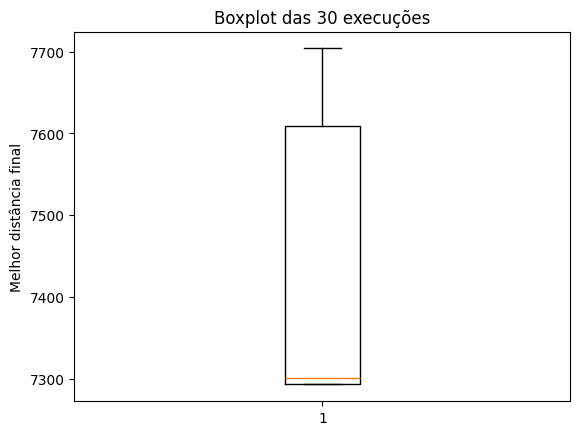

In [ ]:
plt.figure()
plt.boxplot(resultados_finais)
plt.title("Boxplot das 30 execuções")
plt.ylabel("Melhor distância final")
plt.show()